In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run49-IGH-HUMAN-shared-clones.xlsx"
ptfile = "20221003-DataSheet-RUN49.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,RACE,MID,Constant,HEK_cells,Sample
0,N711_S502,BP-T017-2-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S1,...,human,TCRb,P48V01,Th1,yes,no,NaN,no,no,BP-T017-2-Tu_S1
1,N712_S502,BP-T018-2-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S2,...,human,TCRb,P48V01,Th2,yes,no,NaN,no,no,BP-T018-2-Tu_S2
2,N714_S502,BP-T019-2-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S3,...,human,TCRb,P48V01,Th17,yes,no,NaN,no,no,BP-T019-2-Tu_S3
3,N715_S502,BP-T020-2-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S4,...,human,TCRb,P48V01,Tfh,yes,no,NaN,no,no,BP-T020-2-Tu_S4
4,N716_S502,BP-T021-2-Tu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S5,...,human,TCRb,P48V01,Treg,yes,no,NaN,no,no,BP-T021-2-Tu_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones")]
myfiles.sort()
myfiles

['cdr3-clones-AB-ADA-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-DC4Balance-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-MOMA-IGH_HUMAN-after-reassignment.csv',
 'cdr3-clones-MOMA-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-Myositis-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-NGS-IGH_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,AB-ADA147-Tu_S86,CASSPGQRAQYFG,61
1,AB-ADA147-Tu_S86,CASRPGTSGPYNEQFFG,52
2,AB-ADA147-Tu_S86,CASSSSTVALRGYEQYFG,35
3,AB-ADA147-Tu_S86,CASSFG,31
4,AB-ADA147-Tu_S86,CASSEGVEGPEAFFG,28


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
175384,Test08-V-U3_S77,YARDLRGYYDFWSGYDYWGQGTLVT,1
175385,Test08-V-U3_S77,YARHALYGSSWIDYWGQGTLVT,1
175386,Test08-V-U3_S77,YARSSSWFGMDVWGQGTTVT,1
175387,Test08-V-U3_S77,YASFFGGNDVSPAFDIWGQGTMVT,1
175388,Test08-V-U3_S77,YVRGSTDLIAVAGFYYHYYGLDVWGQGTTVT,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,RACE,MID,Constant,HEK_cells
0,AB-ADA147-Tu_S86,CASSPGQRAQYFG,61,N701_S508,AB-ADA147-Tu,NaN,NaN,NaN,NaN,NaN,...,AB-ADA,human,TCRb,40-16-0017,V3_M1,yes,no,NaN,no,no
1,AB-ADA147-Tu_S86,CASRPGTSGPYNEQFFG,52,N701_S508,AB-ADA147-Tu,NaN,NaN,NaN,NaN,NaN,...,AB-ADA,human,TCRb,40-16-0017,V3_M1,yes,no,NaN,no,no
2,AB-ADA147-Tu_S86,CASSSSTVALRGYEQYFG,35,N701_S508,AB-ADA147-Tu,NaN,NaN,NaN,NaN,NaN,...,AB-ADA,human,TCRb,40-16-0017,V3_M1,yes,no,NaN,no,no
3,AB-ADA147-Tu_S86,CASSFG,31,N701_S508,AB-ADA147-Tu,NaN,NaN,NaN,NaN,NaN,...,AB-ADA,human,TCRb,40-16-0017,V3_M1,yes,no,NaN,no,no
4,AB-ADA147-Tu_S86,CASSEGVEGPEAFFG,28,N701_S508,AB-ADA147-Tu,NaN,NaN,NaN,NaN,NaN,...,AB-ADA,human,TCRb,40-16-0017,V3_M1,yes,no,NaN,no,no


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,03-01-0005,AB-ADA198-Tu_S91,CAAGAGTSNQPQHFG,1
1,03-01-0005,AB-ADA198-Tu_S91,CAAGLKSYNEQFFG,1
2,03-01-0005,AB-ADA198-Tu_S91,CAAGPYIDTQYFG,2
3,03-01-0005,AB-ADA198-Tu_S91,CAAGRGGTDTQYFG,1
4,03-01-0005,AB-ADA198-Tu_S91,CAAGVVAAYNEQFFG,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,AB-ADA147-Tu_S86,14265
1,AB-ADA172-Tu_S87,19030
2,AB-ADA188-Tu_S88,21457
3,AB-ADA189-Tu_S89,15744
4,AB-ADA191-Tu_S90,21081


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,03-01-0005,AB-ADA198-Tu_S91,CAAGAGTSNQPQHFG,1,13498
1,03-01-0005,AB-ADA198-Tu_S91,CAAGLKSYNEQFFG,1,13498
2,03-01-0005,AB-ADA198-Tu_S91,CAAGPYIDTQYFG,2,13498
3,03-01-0005,AB-ADA198-Tu_S91,CAAGRGGTDTQYFG,1,13498
4,03-01-0005,AB-ADA198-Tu_S91,CAAGVVAAYNEQFFG,1,13498


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
1061324,Test08,Test08-V-U3_S77,YARHALYGSSWIDYWGQGTLVT,1,18900
1061325,Test08,Test08-V-U3_S77,YARSSSWFGMDVWGQGTTVT,1,18900
1061326,Test08,Test08-V-U3_S77,YASFFGGNDVSPAFDIWGQGTMVT,1,18900
1061327,Test08,Test08-V-U3_S77,YTPRRGYSYGYVGVRWFDPWGQGTLVT,2,18900
1061328,Test08,Test08-V-U3_S77,YVRGSTDLIAVAGFYYHYYGLDVWGQGTTVT,1,18900


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,03-01-0005,AB-ADA198-Tu_S91,CAAGAGTSNQPQHFG,1,13498,0.007409
1,03-01-0005,AB-ADA198-Tu_S91,CAAGLKSYNEQFFG,1,13498,0.007409
2,03-01-0005,AB-ADA198-Tu_S91,CAAGPYIDTQYFG,2,13498,0.014817
3,03-01-0005,AB-ADA198-Tu_S91,CAAGRGGTDTQYFG,1,13498,0.007409
4,03-01-0005,AB-ADA198-Tu_S91,CAAGVVAAYNEQFFG,1,13498,0.007409


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['AB-ADA198-Tu_S91',
 'AB-ADA191-Tu_S90',
 'AB-ADA189-Tu_S89',
 'AB-ADA188-Tu_S88',
 'AB-ADA208-Tu_S92',
 'AB-ADA210-Tu_S93',
 'AB-ADA232-Tu_S103',
 'AB-ADA172-Tu_S87',
 'AB-ADA233-Tu_S104',
 'AB-ADA244-Tu_S106']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,AB-ADA198-Tu_S91,AB-ADA191-Tu_S90,1.452067,0.943978
1,AB-ADA198-Tu_S91,AB-ADA189-Tu_S89,1.081642,1.041667
2,AB-ADA198-Tu_S91,AB-ADA188-Tu_S88,1.052008,0.750338
3,AB-ADA198-Tu_S91,AB-ADA208-Tu_S92,0.933472,0.758888
4,AB-ADA198-Tu_S91,AB-ADA210-Tu_S93,1.785450,1.016807


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,AB-ADA198-Tu_S91,AB-ADA191-Tu_S90,1.452067,0.943978,03-01-0005,03-01-0007
1,AB-ADA232-Tu_S103,AB-ADA191-Tu_S90,1.956085,0.967696,10-02-0012,03-01-0007
2,AB-ADA244-Tu_S106,AB-ADA191-Tu_S90,2.111838,0.740003,40-04-0006,03-01-0007
3,AB-ADA240-Tu_S105,AB-ADA191-Tu_S90,1.313241,0.967696,40-18-0002,03-01-0007
4,T17-04319-T2_S159,AB-ADA191-Tu_S90,0.917317,0.317822,MYO101,03-01-0007


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,6587,Test03-V-U1_S38,Test03-V-U2_S39,75.820298,71.880065,Test03,Test03
1,6762,Test03-V-U2_S39,Test03-V-U3_S40,73.569380,71.756335,Test03,Test03
2,6763,Test03-V-U1_S38,Test03-V-U3_S40,75.381534,68.714151,Test03,Test03
3,5892,Test01-V-U2_S36,Test01-V-U1_S35,59.781985,58.151799,Test01,Test01
4,6069,Test01-V-U3_S37,Test01-V-U2_S36,60.490703,57.295850,Test01,Test01


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,6587,Test03-V-U1_S38,Test03-V-U2_S39,75.820298,71.880065,Test03,Test03,same
1,6762,Test03-V-U2_S39,Test03-V-U3_S40,73.569380,71.756335,Test03,Test03,same
2,6763,Test03-V-U1_S38,Test03-V-U3_S40,75.381534,68.714151,Test03,Test03,same
3,5892,Test01-V-U2_S36,Test01-V-U1_S35,59.781985,58.151799,Test01,Test01,same
4,6069,Test01-V-U3_S37,Test01-V-U2_S36,60.490703,57.295850,Test01,Test01,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run49-IGH-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,6587,Test03-V-U1_S38,Test03-V-U2_S39,75.820298,71.880065,Test03,Test03,same
1,1,6762,Test03-V-U2_S39,Test03-V-U3_S40,73.569380,71.756335,Test03,Test03,same
2,2,6763,Test03-V-U1_S38,Test03-V-U3_S40,75.381534,68.714151,Test03,Test03,same
3,3,5892,Test01-V-U2_S36,Test01-V-U1_S35,59.781985,58.151799,Test01,Test01,same
4,4,6069,Test01-V-U3_S37,Test01-V-U2_S36,60.490703,57.295850,Test01,Test01,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,6587,Test03-V-U1_S38,Test03-V-U2_S39,75.820298,71.880065,Test03,Test03,same,Test03-V-U1_S38->Test03-V-U2_S39,purple
1,1,6762,Test03-V-U2_S39,Test03-V-U3_S40,73.569380,71.756335,Test03,Test03,same,Test03-V-U2_S39->Test03-V-U3_S40,purple
2,2,6763,Test03-V-U1_S38,Test03-V-U3_S40,75.381534,68.714151,Test03,Test03,same,Test03-V-U1_S38->Test03-V-U3_S40,purple
3,3,5892,Test01-V-U2_S36,Test01-V-U1_S35,59.781985,58.151799,Test01,Test01,same,Test01-V-U2_S36->Test01-V-U1_S35,purple
4,4,6069,Test01-V-U3_S37,Test01-V-U2_S36,60.490703,57.295850,Test01,Test01,same,Test01-V-U3_S37->Test01-V-U2_S36,purple


Wrote run49-IGH-HUMAN-shared-clones-all.pdf to disk


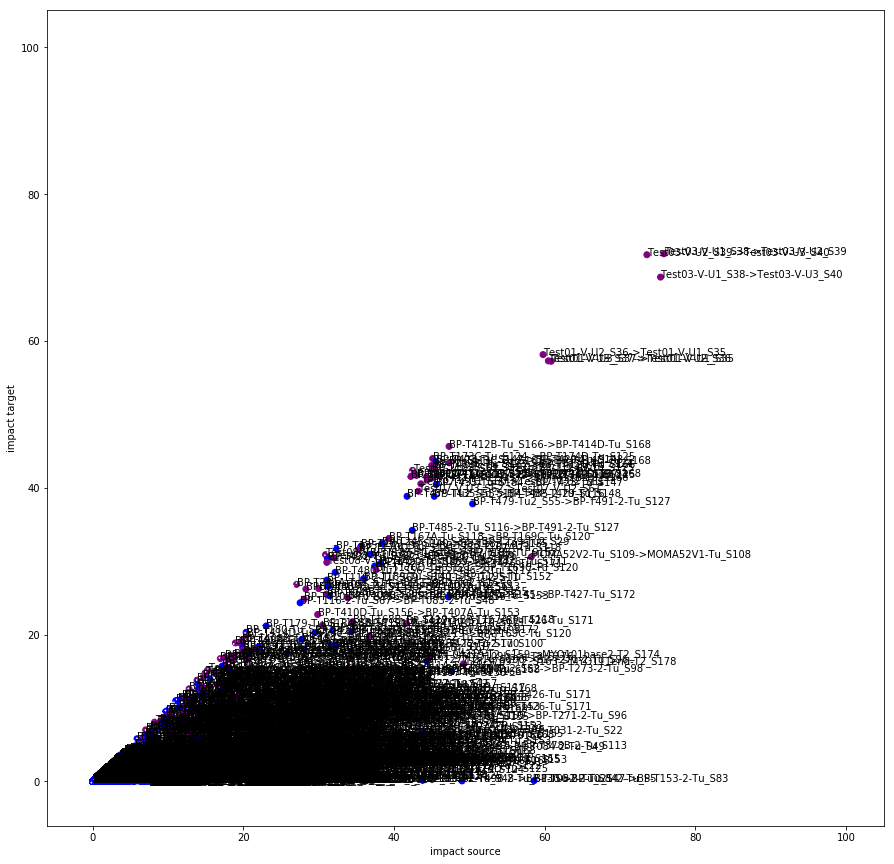

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,8,BP-T423-Tu_S147,BP-T429-Tu_S148,45.537839,43.572490,different,BP-T423-Tu_S147->BP-T429-Tu_S148,blue
1,21,BP-T435-Tu_S184,BP-T423-Tu_S147,45.605749,40.460643,different,BP-T435-Tu_S184->BP-T423-Tu_S147,blue
2,23,BP-T435-Tu_S184,BP-T429-Tu_S148,45.344676,38.846726,different,BP-T435-Tu_S184->BP-T429-Tu_S148,blue
3,24,BP-T479-Tu2_S55,BP-T485-2-Tu_S116,41.731888,38.845964,different,BP-T479-Tu2_S55->BP-T485-2-Tu_S116,blue
4,25,BP-T479-Tu2_S55,BP-T491-2-Tu_S127,50.439358,37.816392,different,BP-T479-Tu2_S55->BP-T491-2-Tu_S127,blue


Wrote run49-IGH-HUMAN-shared-clones-different-ids.pdf to disk


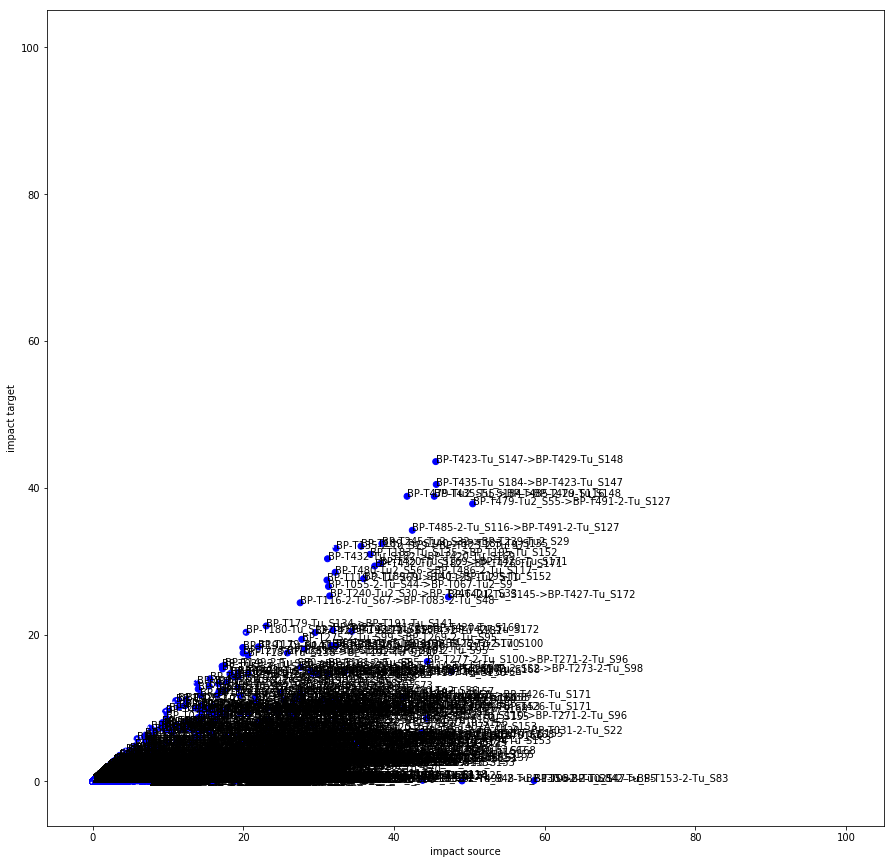

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,03-01-0005,AB-ADA198-Tu_S91,CAAGAGTSNQPQHFG,1,13498,0.007409
1,03-01-0005,AB-ADA198-Tu_S91,CAAGLKSYNEQFFG,1,13498,0.007409
2,03-01-0005,AB-ADA198-Tu_S91,CAAGPYIDTQYFG,2,13498,0.014817
3,03-01-0005,AB-ADA198-Tu_S91,CAAGRGGTDTQYFG,1,13498,0.007409
4,03-01-0005,AB-ADA198-Tu_S91,CAAGVVAAYNEQFFG,1,13498,0.007409


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient          Sample  \
                         nunique   names nunique   
cdr3pep                                            
ALASSVHGGQGTLVT                1  Test08       1   
ARVIAVAGTTDYWGQGTLVT           1  Test04       1   
ASGSGSYVGDAFDIWGQGTMVT         1  Test04       1   
AVAGTMDYYYYMDVWGKGTTVT         1  Test06       1   
AVATIEGVWPVPYFDYWGQGTLVT       1  Test04       2   

                                                            
                                                     names  
cdr3pep                                                     
ALASSVHGGQGTLVT                            Test08-V-U3_S77  
ARVIAVAGTTDYWGQGTLVT                       Test04-V-U1_S63  
ASGSGSYVGDAFDIWGQGTMVT                     Test04-V-U3_S65  
AVAGTMDYYYYMDVWGKGTTVT                     Test06-V-U1_S41  
AVATIEGVWPVPYFDYWGQGTLVT  Test04-V-U2_S64, Test04-V-U1_S63

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient                   cdr3pep       03-01-0005       03-01-0007  \
Sample                            AB-ADA198-Tu_S91 AB-ADA191-Tu_S90   
0                 ALASSVHGGQGTLVT              NaN              NaN   
1            ARVIAVAGTTDYWGQGTLVT              NaN              NaN   
2          ASGSGSYVGDAFDIWGQGTMVT              NaN              NaN   
3          AVAGTMDYYYYMDVWGKGTTVT              NaN              NaN   
4        AVATIEGVWPVPYFDYWGQGTLVT              NaN              NaN   

Patient       08-01-0006       08-01-0011       09-01-0018       09-01-0021  \
Sample  AB-ADA189-Tu_S89 AB-ADA188-Tu_S88 AB-ADA208-Tu_S92 AB-ADA210-Tu_S93   
0                    NaN              NaN              NaN              NaN   
1                    NaN              NaN              NaN              NaN   
2                    NaN              NaN              NaN              NaN   
3                    NaN              NaN              NaN              NaN   
4                    NaN              NaN              NaN              NaN   

Patient        10-02-0012       40-01-0025                    ...  \
Sample  AB-ADA232-Tu_S103 AB-ADA172-Tu_S87 AB-ADA233-Tu_S104  ...   
0                     NaN              NaN               NaN  ...   
1                     NaN              NaN               NaN  ...   
2                     NaN              NaN               NaN  ...   
3                     NaN              NaN               NaN  ...   
4                     NaN              NaN               NaN  ...   

Patient          Test04          Test06                                  \
Sample  Test04-V-U3_S65 Test06-V-U1_S41 Test06-V-U2_S58 Test06-V-U3_S59   
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2               0.00414             NaN             NaN             NaN   
3                   NaN        0.018015             NaN             NaN   
4                   NaN             NaN             NaN             NaN   

Patient          Test07                                          Test08  \
Sample  Test07-V-U1_S60 Test07-V-U2_S61 Test07-V-U3_S62 Test08-V-U1_S75   
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2                   NaN             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   

Patient                                  
Sample  Test08-V-U2_S76 Test08-V-U3_S77  
0                   NaN        0.005291  
1                   NaN             NaN  
2                   NaN             NaN  
3                   NaN             NaN  
4                   NaN             NaN  

[5 rows x 189 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/home/barbera/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


index        cdr3pep Patient  \
                         nunique   
0  303716         CASSFG      62   
1  377750        CASSLFG      43   
2  458931        CASSPFG      29   
3  503155  CASSPSTDTQYFG      29   
4  408166   CASSLNTEAFFG      29   

                                                      Sample  \
                                               names nunique   
0  MYO108, 10-02-0012, P17V01, 40-04-0006, 03-01-...     150   
1  P43V07, 10-02-0012, P17V01, 40-04-0006, 03-01-...      81   
2  P43V07, 10-02-0012, P17V01, P35V010, 40-01-002...      51   
3  P43V07, 10-02-0012, P17V01, 40-04-0006, 03-01-...      46   
4  P17V01, 03-01-0005, 40-01-0025, MYO111, MYO113...      43   

                                                           03-01-0005  \
                                               names AB-ADA198-Tu_S91   
0  BP-T167A-Tu_S118, BP-T275-2-Tu_S99, BP-T126-2-...         0.229664   
1  BP-T158-Tu2_S13, BP-T240-Tu2_S30, BP-T243-Tu2_...         0.014817   
2  BP-T158-Tu2_S13, BP-T409C-Tu_S155, BP-T479-Tu2...              NaN   
3  BP-T409C-Tu_S155, BP-T479-Tu2_S55, BP-T167A-Tu...         0.066677   
4  BP-T240-Tu2_S30, BP-T188-Tu_S139, BP-T479-Tu2_...         0.014817   

        03-01-0007       08-01-0006       08-01-0011  ...          Test04  \
  AB-ADA191-Tu_S90 AB-ADA189-Tu_S89 AB-ADA188-Tu_S88  ... Test04-V-U3_S65   
0         0.222950         0.374746         0.279629  ...             NaN   
1         0.009487         0.019055         0.004660  ...             NaN   
2         0.004744              NaN         0.004660  ...             NaN   
3         0.009487         0.012703              NaN  ...             NaN   
4         0.004744         0.006352         0.018642  ...             NaN   

           Test06                                          Test07  \
  Test06-V-U1_S41 Test06-V-U2_S58 Test06-V-U3_S59 Test07-V-U1_S60   
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

                                           Test08                  \
  Test07-V-U2_S61 Test07-V-U3_S62 Test08-V-U1_S75 Test08-V-U2_S76   
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

                   
  Test08-V-U3_S77  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 194 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 866455
cdr3's in > 1 sample: 105322


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run49-IGH-HUMAN-shared-clones-occurrence.xlsx to disk
